In [26]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.offline import plot
from plotly.graph_objs import Scatter
init_notebook_mode() # run at the start of every ipython notebook to use plotly.offline
                     # this injects the plotly.js source files into the notebook

%matplotlib inline
import matplotlib as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

In [2]:
from IPython.core.display import HTML
css = open("styles/style-table.css").read() + open('styles/style-notebook.css').read() + open("styles/test.css").read()
HTML('<style>{}</style>'.format(css))

In [3]:
dtypes=[str,datetime.date,int,int,int,int]
threemonth_metrics = pd.read_csv("raw_data/three-month-export_2016-04-04.csv",parse_dates=[1])
threemonth_metrics.head()

,item_title,release_date,downloads__april,downloads__march,downloads__february,downloads__total
0,TBP50 - Not Giving a Good Got Damn,2016-04-04 10:24:41,114,0,0,114
1,TBP49 - Welterweight Gold,2016-03-31 10:47:53,330,253,0,583
2,"TBP48 - Inertia, My Friend!",2016-03-27 18:30:33,27,460,0,487
3,TBP47 - Bottoms Up 4,2016-03-20 05:09:56,13,399,0,412
4,TBP46 - The Fundamental Conflict,2016-03-13 19:10:34,10,637,0,647


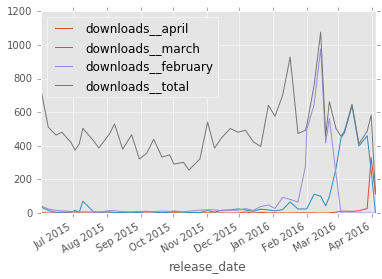

In [5]:
threemonth_metrics.plot(x='release_date')

In [7]:
daily_metrics_May04 = pd.DataFrame.from_csv("raw_data/daily-totals_2016-05-04.csv", index_col=None, parse_dates=[0])
daily_metrics_Apr24 = pd.DataFrame.from_csv("raw_data/daily-totals_2016-04-24.csv", index_col=None, parse_dates=[0])
daily_metrics_Apr17 = pd.DataFrame.from_csv("raw_data/daily-totals_2016-04-17.csv", index_col=None, parse_dates=[0])
daily_metrics_Apr12 = pd.DataFrame.from_csv("raw_data/daily-totals_2016-04-12.csv", index_col=None, parse_dates=[0])
daily_metrics_Apr04 = pd.DataFrame.from_csv("raw_data/daily-totals_2016-04-04.csv", index_col=None, parse_dates=[0])

In [8]:
dates = daily_metrics_May04.date
dates = pd.to_datetime(dates)
start = dates[0]
periods = dates - start
periods_days = periods / np.timedelta64(1, 'D')

In [9]:
import matplotlib.dates as mdates
from scipy.optimize import curve_fit
def exponenial_func(x, a, b, c):
    return a*np.exp(-b*x)+c

x = periods_days
y = daily_metrics_May04.total_downloads
popt, pcov = curve_fit(exponenial_func, x, y, p0=(1, 1e-6, 1))
print("a= {}, b={}, c={}".format(*popt))

xx = np.linspace(1, 400, 1000)
yy = exponenial_func(xx, *popt)



trace = go.Scatter(
    x=x, 
    y=daily_metrics_May04.total_downloads,
    name='Daily downloads',
)
trace2 = go.Scatter(
                  x=xx, 
                  y=yy, 
                  mode='lines',
                  marker=go.Marker(color='rgb(31, 119, 180)'),
                  name='Fit'
                  )

annotation = go.Annotation(
                  x=200,
                  y=400,
                  text='$\\textbf{Fit}: 14.06e^{-0.007181x} - 26.48$',
                  showarrow=False
                  )
data = [trace, trace2]
layout = go.Layout(
    title="The Bitcoin Podcast daily downloads (updated May 4, 2016)",
    xaxis=go.XAxis(
        title='Date',
    ),
    yaxis=go.YAxis(
        title='Number of downloads',
    ),
#     shapes=shape_data,
    annotations=[annotation],
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename="TBP_plots/daily_downloads-exp_fit")

a= 6.608984696648359, b=-0.009631501994967337, c=37.28750291326861


In [69]:
perr = np.sqrt(np.diag(pcov))
perr

array([  1.25832377e+01,   2.52777880e-03,   1.96052393e+01])

In [11]:
trace = go.Scatter(x=daily_metrics_May04.date, y=daily_metrics_May04.total_downloads)
# Get Dataframe of release dates
episodes = pd.DataFrame.from_csv('/Users/coreypetty/PycharmProjects/TBP_metrics/raw_data/three-month-export_2016-05-04.csv', 
                                            index_col=None, parse_dates=['release_date'])
episodes = episodes[['release_date','item_title','downloads__total']]
episodes.columns = ['release_date','title', 'downloads']
release_dates = list(episodes.release_date)

# Get ymax from total_downloads
ymax = daily_metrics_May04.total_downloads.max()

# Make function to fill in shape data
def make_shape_data(release_date, ymax):
    return {
        'type': 'line',
        'x0': release_date,
        'y0': 0,
        'x1': release_date,
        'y1': ymax,
        'line': {
                'color': 'rgba(55, 128, 191, 0.3)',
                'width': 1,
                },
        }
# Make lines shape data for each release date
shape_data = []
for release_date in release_dates:
    shape_data.append(make_shape_data(release_date, ymax))

layout = {
    'title': "The Bitcoin Podcast daily downloads (updated May 04, 2016)",
    'xaxis': {
        'title': 'Date',
    },
    'yaxis': {
        'title': 'Number of downloads',
    },
    'shapes': shape_data
}

data = [trace]
fig = {
    'data': data,
    'layout': layout,
}
#iplot(fig) # offline
py.iplot(fig, filename='TBP_plots/daily_total-downloads') # update online

In [19]:
daily_May04 = daily_metrics_May04.set_index('date')
weekly_May04 = daily_May04.resample('W').sum()
monthly_May04 = daily_May04.resample('M').sum()
daily_Apr24 = daily_metrics_Apr24.set_index('date')
monthly_Apr24 = daily_Apr24.resample('M').sum()
daily_Apr17 = daily_metrics_Apr17.set_index('date')
monthly_Apr17 = daily_Apr17.resample('M').sum()
daily_Apr12 = daily_metrics_Apr12.set_index('date')
monthly_Apr12 = daily_Apr12.resample('M').sum()
daily_Apr04 = daily_metrics_Apr04.set_index('date')
monthly_Apr04 = daily_Apr04.resample('M').sum()

In [27]:
weekly_May04.iplot(kind="bar", filename='TBP_plots/downloads-weekly',
        title='The Bitcoin Podcast weekly downloads  (updated May 4, 2016)',
        yTitle='Weekly downloads')

In [18]:
#  Sort and plot by month
months={0:"January", 1:"February", 2:"March", 3:"April", 45:"May", 46:"May ", 5:"June", 6:"July", 7:"August", 8:"September", 9:"October", 10:"November", 11:"December"}
years={5:"2015", 6:"2016"}
#  Relabel to month name
ts = pd.DataFrame(monthly_May04).set_index(pd.Series([45,5,6,7,8,9,10,0,1,2,3,46]).apply(lambda x: months[x]))
#  Plot
ts.iplot(kind="bar", filename='TBP_plots/downloads-monthly',
        title='The Bitcoin Podcast monthly downloads  (updated May 4, 2016)',
        yTitle='Total downloads')

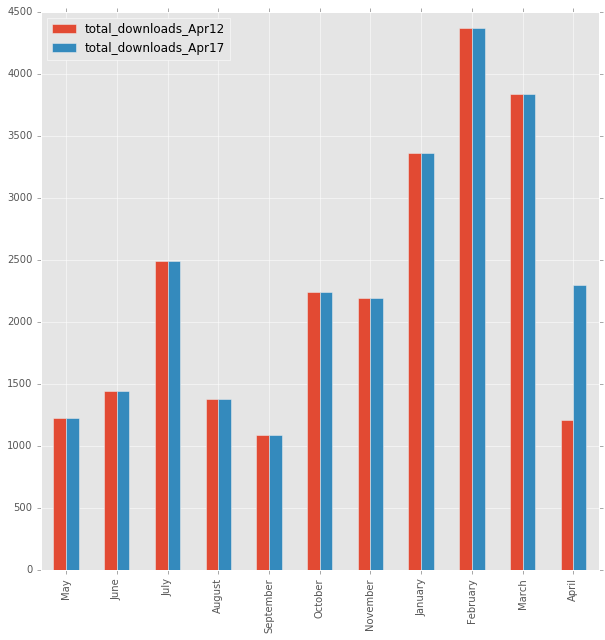

In [5]:
#  Sort and plot by month
months={0:"January", 1:"February", 2:"March", 3:"April", 4:"May", 5:"June", 6:"July", 7:"August", 8:"September", 9:"October", 10:"November", 11:"December"}
daily_Apr17 = daily_metrics_Apr17.set_index('date')
daily_Apr12 = daily_metrics_Apr12.set_index('date')
daily_Apr04 = daily_metrics_Apr04.set_index('date')
ts = daily_Apr17.total_downloads.resample('M').sum()
ts_old = daily_Apr12.total_downloads.resample('M').sum()
#  Relabel to month name
ts = pd.DataFrame(ts).set_index(pd.Series([4,5,6,7,8,9,10,0,1,2,3]).apply(lambda x: months[x]))
ts.columns = ['total_downloads_Apr17']
ts_old = pd.DataFrame(ts_old).set_index(pd.Series([4,5,6,7,8,9,10,0,1,2,3]).apply(lambda x: months[x]))
ts_old.columns = ['total_downloads_Apr12']
#  Merge
compared = pd.merge(ts_old, ts, left_index=True, right_index=True)
#  Plot
compared.plot(kind='bar', figsize=(10,10))